In [52]:
import pandas as pd


In [53]:
!pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 3.7 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.8 MB 3.5 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.8 MB 3.0 MB/s eta 0:00:03
   ------------ --------------------------- 2.4/7.8 MB 2.9 MB/s eta 0:00:02
   ---------------- ----------------------- 3.1/7.8 MB 3.0 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/7.8 MB 2.9 MB/s eta 0:00:02
   -------------------- ------------------- 3.9/7.8 MB 2.8 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/7.8 MB 2.6 MB/s eta 0:00:02
   ------------------------- -------------- 5.0/7.8 MB 2.6 MB/s eta 0:00:02
   ---------------------------- ----------- 5.5/7.8 MB 2.6 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/7.8 MB 2.6 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 2.5 MB/s eta 0:00:01
   ----------------

In [56]:
!pip install seaborn

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
#Load dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
#Display the first few row of train and test dataset
print(train_data.head())
print(test_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

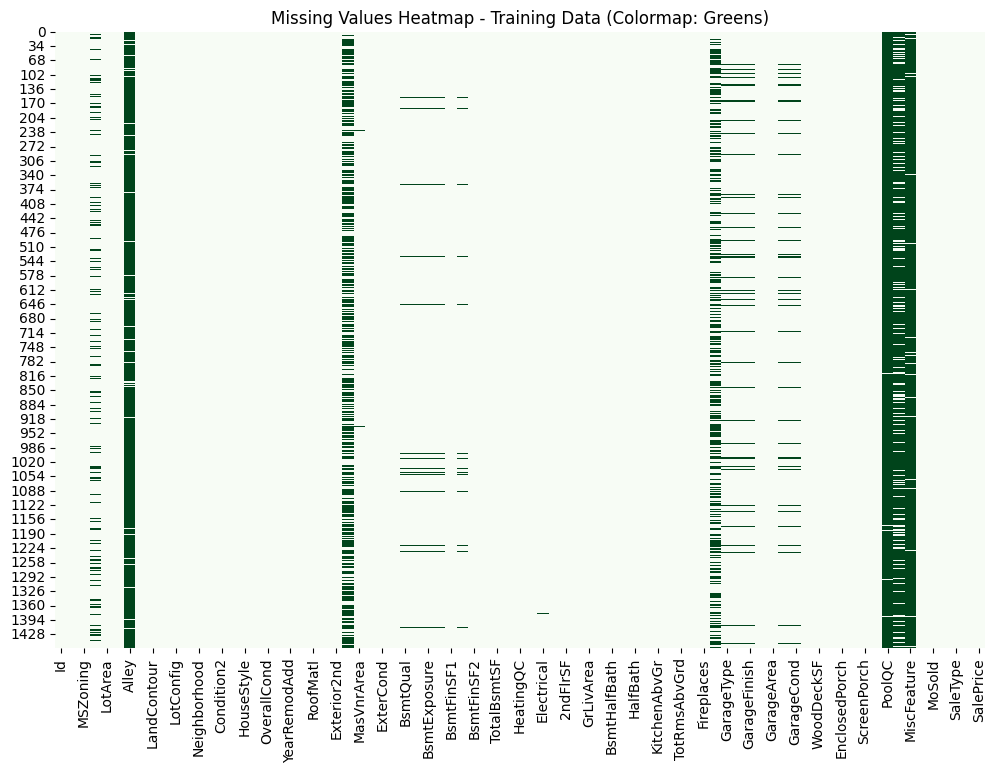

In [68]:
# Define colormaps to use
colormaps = ['Greens']

# Visualize missing values with different colormaps
for cmap in colormaps:
    plt.figure(figsize=(12, 8))
    sns.heatmap(train_data.isnull(), cbar=False, cmap=cmap)
    plt.title(f'Missing Values Heatmap - Training Data (Colormap: {cmap})')
    plt.show()

In [5]:
#check for missing values
print(train_data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [35]:
#Handle the missing value
numeric_feature= train_data.select_dtypes(include = [int, float]).columns.intersection(test_data.columns)
print(numeric_feature)
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [18]:
train_data[numeric_feature] = train_data[numeric_feature].fillna(train_data[numeric_feature].median())
test_data[numeric_feature]= test_data[numeric_feature].fillna(test_data[numeric_feature].median())


In [19]:
# Get common categorical columns between train and test data
common_categorical_features = train_data.select_dtypes(include=[object]).columns.intersection(test_data.columns)

In [ ]:
# Handle missing values for categorical columns by filling with mode
train_data[common_categorical_features] = train_data[common_categorical_features].apply(lambda x: x.fillna(x.mode()[0]))
test_data[common_categorical_features] = test_data[common_categorical_features].apply(lambda x: x.fillna(train_data[x.name].mode()[0]))

In [28]:
!pip install scikit-learn

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [36]:
# Define features and target variable
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

In [37]:
# Prepare training and test data
X = train_data[features].fillna(train_data[features].median())
y = train_data[target]
X_test = test_data[features].fillna(train_data[features].median())

In [43]:
# Split the training data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [45]:
y_pred = model.predict(X_val)

In [46]:
# Evaluate the model
mse = mean_squared_error(Y_val, y_pred)
r2 = r2_score(Y_val, y_pred)

In [47]:
print(f'Mean Squared Error:{mse}')
print(f'R-squared:{r2}')

Mean Squared Error:2810942965.2180657
R-squared:0.6335301929422243


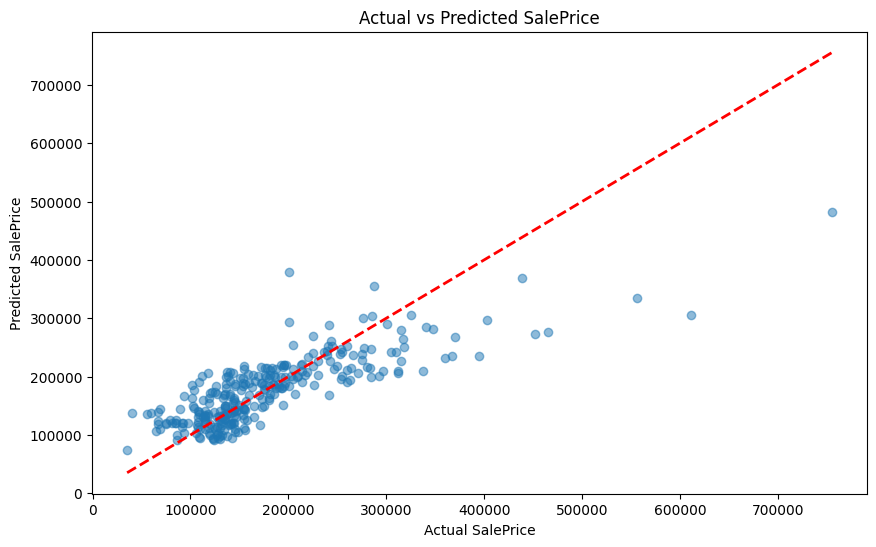

In [69]:
# Visualize the model's performance
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.show()

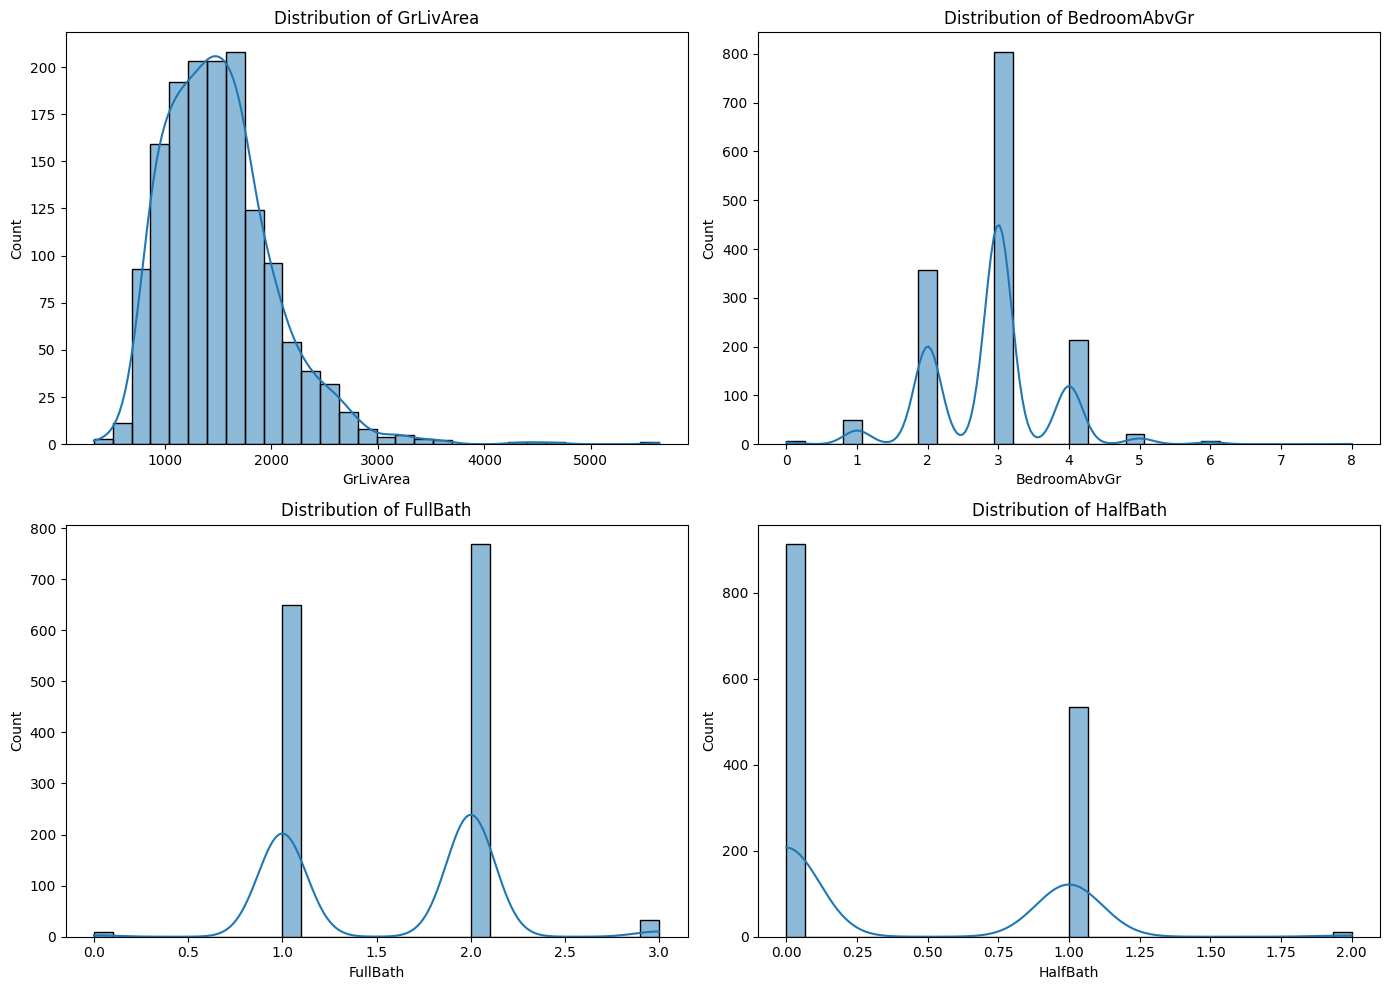

In [70]:
# Visualize feature distributions
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [48]:
# Make predictions on the test data
test_predictions = model.predict(X_test)

In [71]:
# Prepare the submission DataFrame
result = pd.DataFrame({
    'Id' : test_data['Id'],
    'SalePrice' : test_predictions 
})
print(result)

        Id      SalePrice
0     1461  121423.030985
1     1462  143380.870622
2     1463  204748.668874
3     1464  202205.354725
4     1465  191336.364775
...    ...            ...
1454  2915  119270.252496
1455  2916  119270.252496
1456  2917  101383.283260
1457  2918  102247.226188
1458  2919  242491.450835

[1459 rows x 2 columns]


In [50]:
# Save the predictions to a CSV file
result.to_csv('submission.csv', index=False)